In [83]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from dataclasses import dataclass

In [84]:
SEED = 42
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [85]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [86]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


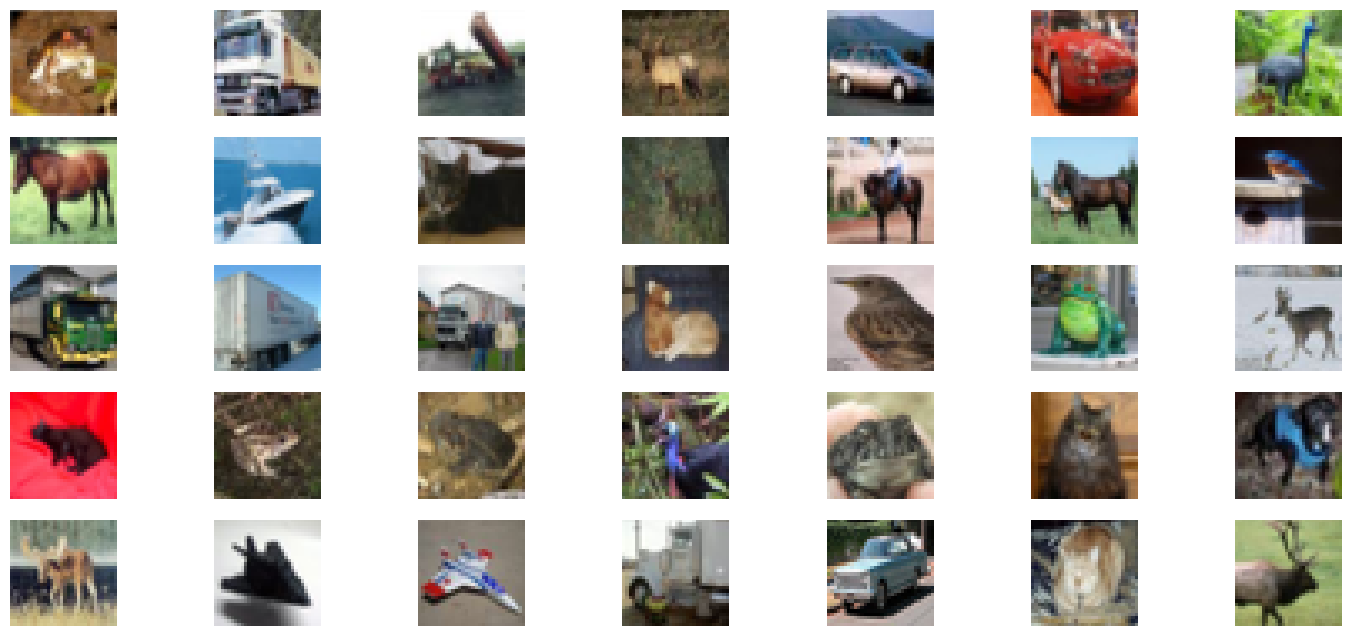

In [87]:
plt.figure(figsize=(18, 8))
for i in range(35):
    plt.subplot(5, 7, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')

In [88]:
# Normalize images to the range [0, 1].
X_train = X_train.astype("float32") / 255
X_test  = X_test.astype("float32")  / 255

# Change the labels from integer to categorical data.
print('Original (integer) label for the first training sample: ', y_train[0])

# Convert labels to one-hot encoding.
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

print('After conversion to categorical one-hot encoded labels: ', y_train[0])

Original (integer) label for the first training sample:  [6]
After conversion to categorical one-hot encoded labels:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [89]:
def cnn_model(input_shape=(32,32,3)):
  model = Sequential()

  #-----------------------------------
  # Conv Block 1: 32 Filters, Maxpool.
  #------------------------------------
  model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=input_shape))
  model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
  model.add(MaxPool2D(pool_size=(2,2)))

  #-----------------------------------
  # Conv Block 2: 64 Filters, Maxpool.
  #------------------------------------
  model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
  model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
  model.add(MaxPool2D(pool_size=(2,2)))

  #-----------------------------------
  # Conv Block 3: 64 Filters, Maxpool.
  #------------------------------------
  model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
  model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
  model.add(MaxPool2D(pool_size=(2,2)))

  #------------------------------------
  # Flatten the convolutional features.
  #------------------------------------
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  return model


In [90]:
model = cnn_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

This is a summary of the architecture of a convolutional neural network (CNN) model, where each layer is described by its type, output shape, and the number of parameters (weights and biases) it contains. Let me break it down for you layer by layer:

### Layer-wise Explanation:

1. **`conv2d_7 (Conv2D)`**:
   - **Type**: 2D Convolutional Layer
   - **Output Shape**: `(None, 32, 32, 32)`
     - The shape of the output is `(batch_size, height, width, channels)`. Here, the image is of size 32x32, and the layer has 32 filters.
     - `None` indicates the batch size is flexible.
   - **Param #**: 896
     - The parameters are calculated as `(filter_height * filter_width * input_channels + 1) * number_of_filters`, where the `+1` comes from the bias term.
     - Assuming the input has 3 channels (e.g., RGB image), the parameters are:
       - `(3 * 3 * 3 + 1) * 32 = 896`.

2. **`conv2d_8 (Conv2D)`**:
   - **Type**: 2D Convolutional Layer
   - **Output Shape**: `(None, 32, 32, 32)`
     - The output shape remains the same as the previous layer, but more filters (32) are applied.
   - **Param #**: 9,248
     - Parameters are:
       - `(3 * 3 * 32 + 1) * 32 = 9,248`.

3. **`max_pooling2d_3 (MaxPooling2D)`**:
   - **Type**: Max Pooling Layer
   - **Output Shape**: `(None, 16, 16, 32)`
     - This layer downsamples the feature map by applying a 2x2 pooling operation. The height and width are halved (from 32 to 16), but the number of channels (32) remains the same.
   - **Param #**: 0
     - MaxPooling layers have no learnable parameters, as they only perform a downsampling operation.

4. **`conv2d_9 (Conv2D)`**:
   - **Type**: 2D Convolutional Layer
   - **Output Shape**: `(None, 16, 16, 64)`
     - The output feature map has 64 filters now, with the same height and width as the input.
   - **Param #**: 18,496
     - Parameters are:
       - `(3 * 3 * 32 + 1) * 64 = 18,496`.

5. **`conv2d_10 (Conv2D)`**:
   - **Type**: 2D Convolutional Layer
   - **Output Shape**: `(None, 16, 16, 64)`
     - The output remains the same shape, with 64 filters.
   - **Param #**: 36,928
     - Parameters are:
       - `(3 * 3 * 64 + 1) * 64 = 36,928`.

6. **`max_pooling2d_4 (MaxPooling2D)`**:
   - **Type**: Max Pooling Layer
   - **Output Shape**: `(None, 8, 8, 64)`
     - The MaxPooling layer downsamples the feature map again, reducing the height and width by half, while keeping the 64 channels.
   - **Param #**: 0
     - No parameters, as it's just downsampling.

7. **`conv2d_11 (Conv2D)`**:
   - **Type**: 2D Convolutional Layer
   - **Output Shape**: `(None, 8, 8, 64)`
     - Another convolution layer, keeping the output size and number of channels the same.
   - **Param #**: 36,928
     - Parameters are:
       - `(3 * 3 * 64 + 1) * 64 = 36,928`.

8. **`conv2d_12 (Conv2D)`**:
   - **Type**: 2D Convolutional Layer
   - **Output Shape**: `(None, 8, 8, 64)`
     - Same as the previous layer, with the same output shape and number of channels.
   - **Param #**: 36,928
     - Parameters are calculated similarly: `(3 * 3 * 64 + 1) * 64`.

9. **`max_pooling2d_5 (MaxPooling2D)`**:
   - **Type**: Max Pooling Layer
   - **Output Shape**: `(None, 4, 4, 64)`
     - The feature map is downsampled one last time, reducing the height and width to 4x4, while keeping 64 channels.
   - **Param #**: 0

10. **`flatten_1 (Flatten)`**:
   - **Type**: Flatten Layer
   - **Output Shape**: `(None, 1024)`
     - This layer flattens the 4x4x64 feature map into a 1D vector of size `4 * 4 * 64 = 1024`.
   - **Param #**: 0
     - No parameters, as it only reshapes the data.

11. **`dense_2 (Dense)`**:
   - **Type**: Fully Connected (Dense) Layer
   - **Output Shape**: `(None, 512)`
     - A dense layer with 512 neurons.
   - **Param #**: 524,800
     - Parameters are:
       - `1024 (input) * 512 (output) + 512 (bias) = 524,800`.

12. **`dense_3 (Dense)`**:
   - **Type**: Fully Connected (Dense) Layer
   - **Output Shape**: `(None, 10)`
     - A final dense layer with 10 neurons, likely for classification into 10 classes.
   - **Param #**: 5,130
     - Parameters are:
       - `512 (input) * 10 (output) + 10 (bias) = 5,130`.

### Summary:
- The CNN architecture begins with multiple convolutional layers, each extracting different features from the input image, followed by pooling layers that downsample the feature maps.
- The flattened feature map is passed into fully connected (dense) layers to learn higher-level representations.
- The final layer outputs a vector of size 10, possibly for a classification task (e.g., 10-class image classification like CIFAR-10).


In [91]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [92]:
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=31,
                    verbose=1,
                    validation_split=.3,
                   )

Epoch 1/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.2716 - loss: 1.9405 - val_accuracy: 0.4572 - val_loss: 1.4865
Epoch 2/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.4876 - loss: 1.4035 - val_accuracy: 0.5815 - val_loss: 1.1792
Epoch 3/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.5819 - loss: 1.1714 - val_accuracy: 0.6335 - val_loss: 1.0506
Epoch 4/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6449 - loss: 1.0055 - val_accuracy: 0.6581 - val_loss: 0.9683
Epoch 5/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6850 - loss: 0.8930 - val_accuracy: 0.6944 - val_loss: 0.8787
Epoch 6/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7212 - loss: 0.7871 - val_accuracy: 0.7103 - val_loss: 0.8314
Epoch 7/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.7555 - loss: 0.6976 - val_accuracy: 0.7216 - val_loss: 0.7999
Epoch 8/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7800 - loss: 0.6235 - val_accu

In [77]:
# def plot_loss_curves(history):
#     plt.plot(history.history["loss"], label = 'Training loss', color = 'green')
#     plt.plot(history.history["val_loss"], label='Validation loss', color = 'red')
#     plt.title("Loss Curves")
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.grid(True)
#     plt.figure(figsize=(50, 50))
#     plt.show()
# plot_loss_curves(history)

In [79]:
# def plot_accuracy_curves(history):
#     plt.plot(history.history["accuracy"], label = 'Training accuracy', color = 'green')
#     plt.plot(history.history["val_accuracy"], label='Validation accuracy', color = 'red')
#     plt.title("Loss Curves")
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.grid(True)
#     plt.figure(figsize=(50, 50))
#     plt.show()
# plot_accuracy_curves(history)

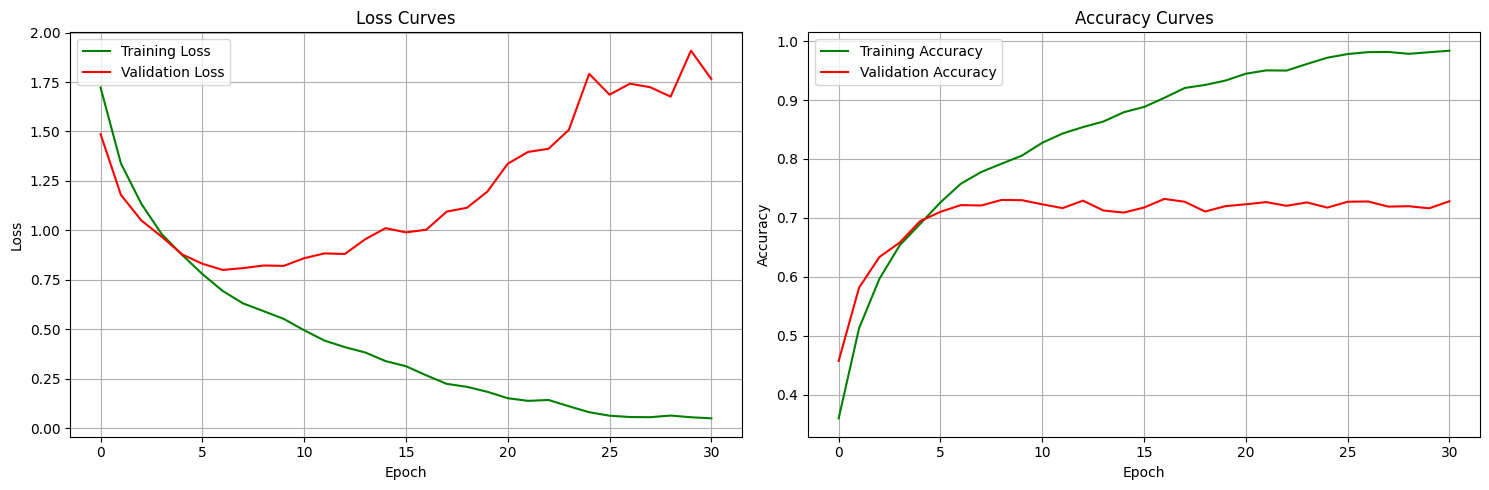

In [93]:
def plot_loss_and_accuracy_curves(history):
    # Create subplots: 1 row, 2 columns
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Plot the loss curves in the first subplot (ax[0])
    ax[0].plot(history.history["loss"], label='Training Loss', color='green')
    ax[0].plot(history.history["val_loss"], label='Validation Loss', color='red')
    ax[0].set_title('Loss Curves')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend()
    ax[0].grid(True)

    # Plot the accuracy curves in the second subplot (ax[1])
    ax[1].plot(history.history["accuracy"], label='Training Accuracy', color='green')
    ax[1].plot(history.history["val_accuracy"], label='Validation Accuracy', color='red')
    ax[1].set_title('Accuracy Curves')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()
    ax[1].grid(True)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

plot_loss_and_accuracy_curves(history)

In [94]:
def cnn_model_dropout(input_shape=(32,32,3)):
  model = Sequential()

  #-----------------------------------
  # Conv Block 1: 32 Filters, Maxpool.
  #------------------------------------
  model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=input_shape))
  model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  #-----------------------------------
  # Conv Block 2: 64 Filters, Maxpool.
  #------------------------------------
  model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
  model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  #-----------------------------------
  # Conv Block 3: 64 Filters, Maxpool.
  #------------------------------------
  model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
  model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  #------------------------------------
  # Flatten the convolutional features.
  #------------------------------------
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))

  return model

In [95]:
model_dropout = cnn_model_dropout()
model_dropout.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [96]:
model_dropout.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [97]:
history_dropout = model_dropout.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=31,
                    verbose=1,
                    validation_split=.3,
                   )

Epoch 1/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.2047 - loss: 2.0948 - val_accuracy: 0.4071 - val_loss: 1.6122
Epoch 2/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.4151 - loss: 1.5810 - val_accuracy: 0.5151 - val_loss: 1.3485
Epoch 3/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.5049 - loss: 1.3659 - val_accuracy: 0.5803 - val_loss: 1.1671
Epoch 4/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5610 - loss: 1.2168 - val_accuracy: 0.6139 - val_loss: 1.0746
Epoch 5/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.5997 - loss: 1.1172 - val_accuracy: 0.6575 - val_loss: 0.9765
Epoch 6/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.6307 - loss: 1.0341 - val_accuracy: 0.6619 - val_loss: 0.9659
Epoch 7/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.6553 - loss: 0.9629 - val_accuracy: 0.6767 - val_loss: 0.9194
Epoch 8/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.6759 - loss: 0.9188 - val_acc

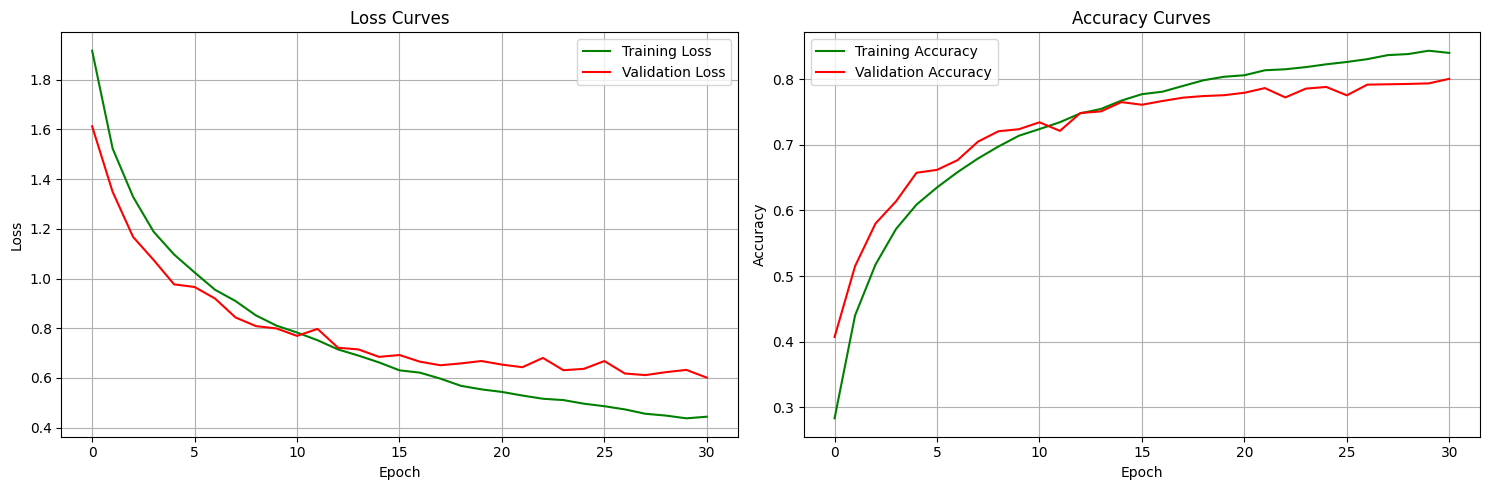

In [102]:
def plot_loss_and_accuracy_curves(history_dropout):
    # Create subplots: 1 row, 2 columns
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Plot the loss curves in the first subplot (ax[0])
    ax[0].plot(history_dropout.history["loss"], label='Training Loss', color='green')
    ax[0].plot(history_dropout.history["val_loss"], label='Validation Loss', color='red')
    ax[0].set_title('Loss Curves')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend()
    ax[0].grid(True)

    # Plot the accuracy curves in the second subplot (ax[1])
    ax[1].plot(history_dropout.history["accuracy"], label='Training Accuracy', color='green')
    ax[1].plot(history_dropout.history["val_accuracy"], label='Validation Accuracy', color='red')
    ax[1].set_title('Accuracy Curves')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()
    ax[1].grid(True)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

plot_loss_and_accuracy_curves(history_dropout)

In [103]:
model_dropout.save("model_dropout.keras")

In [104]:
from tensorflow.keras import models
reloaded_model_dropout = models.load_model('model_dropout.keras')

In [105]:
test_loss, test_acc = reloaded_model_dropout.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc*100:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7915 - loss: 0.6266
Test accuracy: 79.280


In [109]:
test_loss, test_acc = reloaded_model_dropout.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc*100:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7915 - loss: 0.6266
Test accuracy: 79.280


In [139]:
def evaluate_model(dataset, model):
    class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
    data_batch = dataset[0: 18]
    # Moved predictions inside the loop to make it available within the loop's scope
    predictions = model.predict(data_batch)
    num_matches = 0
    plt.figure(figsize=(20, 8))

    # Loop through the first 18 images
    for i in range(18):
        plt.subplot(3, 6, i + 1)
        plt.imshow(X_test[i])
        plt.axis('off')

        # Get the predicted and true class indices
        pred_idx = np.argmax(predictions[i])
        truth_idx = np.argmax(y_test[i])  # Assuming y_test is one-hot encoded

        # Display the title with true and predicted class
        title = f"{class_names[truth_idx]} : {class_names[pred_idx]}"
        title_obj = plt.title(title, fontsize=13)

        # Color the title green for correct, red for incorrect predictions
        plt.setp(title_obj, color='g' if pred_idx == truth_idx else 'r')

        # Increment correct predictions count
        if pred_idx == truth_idx:
            num_matches += 1

    # Calculate accuracy
    accuracy = num_matches / 18
    print(f"Prediction accuracy: {accuracy:.2f}")

    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediction accuracy: 0.89


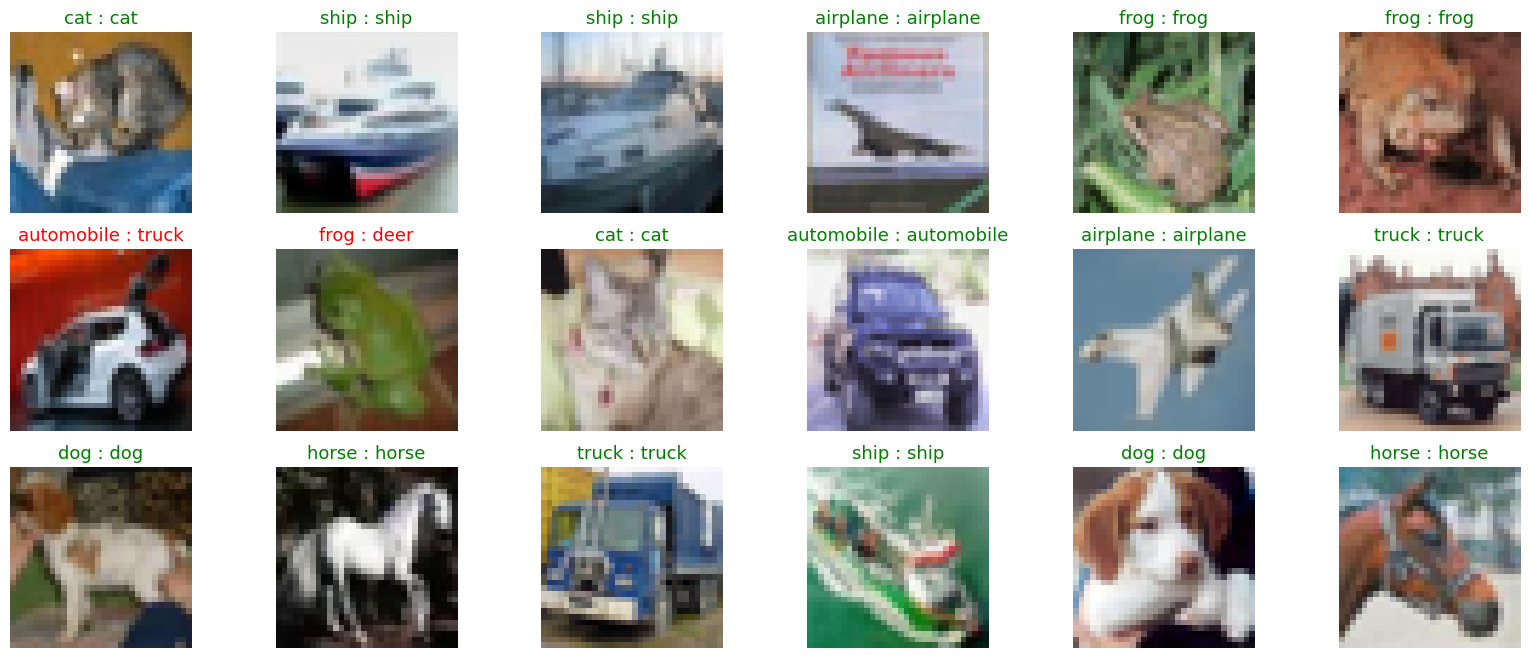

In [140]:
evaluate_model(X_test, reloaded_model_dropout)

In [141]:
# Generate predictions for the test dataset.
predictions = reloaded_model_dropout.predict(X_test)

# For each sample image in the test dataset, select the class label with the highest probability.
predicted_labels = [np.argmax(i) for i in predictions]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


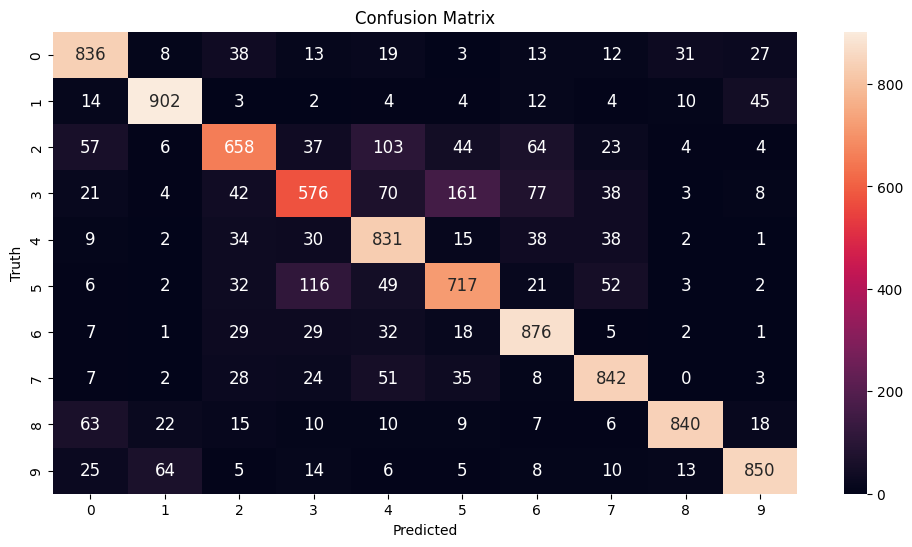

In [142]:
# Convert one-hot encoded labels to integers.
y_test_integer_labels = tf.argmax(y_test, axis=1)

# Generate a confusion matrix for the test dataset.
cm = tf.math.confusion_matrix(labels=y_test_integer_labels, predictions=predicted_labels)

# Plot the confusion matrix as a heatmap.
plt.figure(figsize=[12, 6])
import seaborn as sns

sns.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()